We'll focus on looking at the Seattle Crime data by days of the week and see if we can figure out if there was one particular day of the week that was worse than the others, and why that was.
  

This was done in python using the pandas library and plotted with that and matplotlib.

The code and plots follow.  (The code is messy and the plots could certainly be nicer.  I was learning to use these IPython (Jupyter) notebooks, pandas, and matplotlib all at the same time.)

First: Import the packages we'll be using and set helpful constants.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
from matplotlib.dates import WEEKDAYS
import mpl_toolkits.mplot3d
plt.style.use('ggplot')
import datetime
from pylab import *
%matplotlib inline

In [32]:
# constants we'll use to help format plots
COLORMAP = 'gnuplot2'
TITLESIZE = 24
TITLEYPOS = 1.08
NUMDAYS = 7

Read in the Seattle 2014 summer crime data using the panda "read_csv" function.  Use the URL that points to the datafile on my github repo

In [4]:
seattle_data_url = "https://raw.githubusercontent.com/weedySeaDragon/datasci_course_materials/master/assignment6" \
       "/seattle_incidents_summer_2014.csv"

In [5]:
df = pd.read_csv(seattle_data_url,  dtype={'RMS CDW ID': int ,'General Offense Number': int,
                              'Offense Code':str, 'Offense Code Extension': int,
                              'Offense Type': str, 'Summary Offense Code': str,
                              'Summarized Offense Description':str,
                              'Date Reported': datetime.datetime, 'Occurred Date or Date Range Start': datetime.datetime,
                              'Occurred Date Range End': datetime.datetime, 'Hundred Block Location': str,
                              'District/Sector': str, 'Zone/Beat': str, 'Census Tract 2000': float,
                              'Longitude': float, 'Latitude': float, 'Location': str, 'Month': int, 'Year': int} )

Verify that we've been able to read in the data by showing the first 2 rows:

In [6]:
df.head(2)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014


Change to a Date/Time data type that is more useful.  Print out a few rows with our new data columns to verify that our new columns (with the new Date/Time types) really worked.

In [7]:
# create actual pandas datetime objects from the data:
df['occur_or_start_time'] = df['Occurred Date or Date Range Start'].map(lambda x: ( pd.to_datetime(x,
                                                                                     format = '%m/%d/%Y %H:%M:%S %p',
                                                                                    errors='ignore') ) )
df['occur_end_time'] = df['Occurred Date Range End'].map(lambda x: ( pd.to_datetime(x,
                                                                     format = '%m/%d/%Y %H:%M:%S %p',
                                                                     errors='ignore')) )
df['reported_time'] = df['Date Reported'].map(lambda x: ( pd.to_datetime(x,
                                                          format = '%m/%d/%Y %H:%M:%S %p',
                                                          errors='ignore')) )

# prove that we've done it by showing 5 rows with these new columns:
df[['RMS CDW ID', 'Offense Type', 'reported_time', 'occur_or_start_time','occur_end_time']][:5]

,RMS CDW ID,Offense Type,reported_time,occur_or_start_time,occur_end_time
0,483839,BURGLARY-FORCE-RES,2015-06-28 10:31:00,2014-06-28 10:31:00,2015-06-28 10:31:00
1,481252,FRAUD-IDENTITY THEFT,2015-06-24 11:09:00,2014-06-01 12:00:00,2015-06-24 11:09:00
2,481375,THEFT-MAIL,2015-06-22 09:22:00,2014-08-31 09:00:00,NaT
3,481690,COUNTERFEIT,2015-06-21 03:52:00,2014-06-20 01:38:00,NaT
4,478198,THEFT-OTH,2015-06-20 11:59:00,2014-06-01 11:59:00,2014-11-01 12:00:00


Assign the day of the week to each of the time items (reported, start, etc)

In [8]:
# need to order days of week -- so just leave the number in there.  Use  days[] when we print them out.
days = np.array(['Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday',
                 'Sunday'])
    #orig: put the text in there, but we loose the ordering ability:
    #df['reported_dayofweek'] = df['reported_time'].map(lambda x: (days[x.dayofweek] if x is not pd.NaT else ''))
    #df['occur_start_dayofweek'] = df['occur_or_start_time'].map(lambda x: (days[x.dayofweek] if x is not pd.NaT else ''))
    #df['occur_end_dayofweek'] = df['occur_end_time'].map(lambda x: (days[x.dayofweek] if x is not pd.NaT else ''))

df['reported_dayofweek'] = df['reported_time'].dt.dayofweek
df['occur_start_dayofweek'] = df['occur_or_start_time'].dt.dayofweek
df['occur_end_dayofweek'] = df['occur_end_time'].dt.dayofweek

Now (finally) create the Data Frames (the main data structures holding the data).

In [9]:
# create the Data Frames (DFs) that we'll use
#df.groupby(["occur_start_dayofweek","Offense Type"]).count() # 718 rows x 41 cols
dayofweekDF = df.groupby(["occur_start_dayofweek"])
dayofweekDFcounts =  dayofweekDF.count() # 7 rows x 42 cols
dayofweekDFcounts['Offense Start'] = dayofweekDFcounts['Offense Type'] # we're just creating a different label so our plots look nice; the total [count] is the same

weekdayOffenses = dayofweekDFcounts['Offense Start']

 # build the DF with offense types for each day, with count and rank info
offensesByDay = {}
daysData = {}
for i in range(0,7):  # one for each day of the week
        thisDay = dayofweekDF.get_group(i)
        offensesByDay[i] = (thisDay['Offense Type'].value_counts())
        todayDF = pd.DataFrame()
        thisDay = offensesByDay[i]
        todayDF['Offense Type'] = thisDay.keys()
        todayDF['count'] = thisDay.get_values()
        todayDF['rank'] = [r for r in range(0, thisDay.keys().size)]
        todayDF['day'] = i
        daysData[i] = todayDF

offensesByDayDF = pd.concat(daysData)
offensesByDayDF = offensesByDayDF.fillna(0)

top10 = df['Offense Type'].value_counts()

# Visualizations

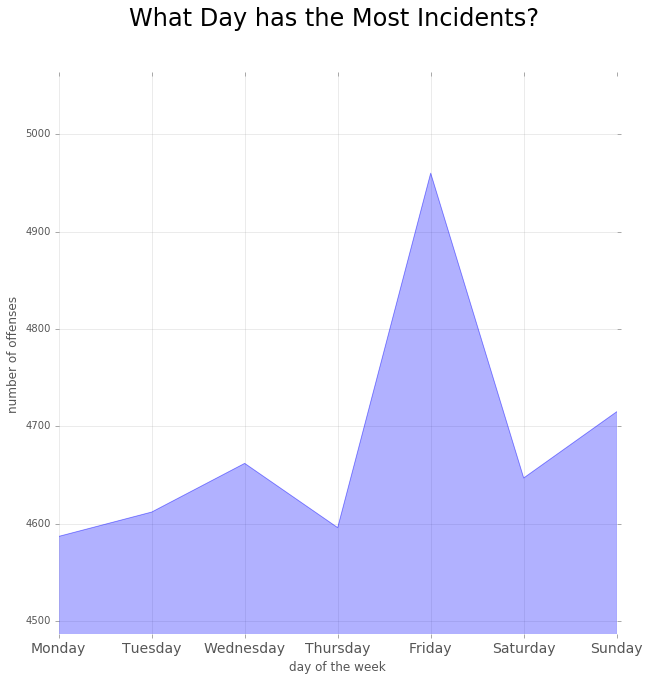

In [10]:
weekdayPlot = weekdayOffenses.plot(legend=False, figsize=(10,10),color='b', alpha=0.3, kind='area') 
plt.ylabel("number of offenses")
plt.xlabel("day of the week")       

# Remove grid lines (dotted lines inside plot)
plt.title("What Day has the Most Incidents? ", fontsize=TITLESIZE,  y=TITLEYPOS)
figure(facecolor='white')
#weekdayPlot.legend.remove()
weekdayPlot.set_frame_on(False)
weekdayPlot.grid(True, color='grey', alpha=0.3)
ymax = weekdayOffenses.max() + 100
ymin = weekdayOffenses.min() - 100
weekdayPlot.set_ylim([ymin, ymax])
xticklabels = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekdayPlot.set_xticklabels(xticklabels, fontsize = 14)
#weekdayPlot.set_xlabel(fontsize=16)

show()

Let's see if we can drill down into the data and see what's going on.
   


## What were the top 10 offenses were during the summer?  Maybe that will account for Friday's high number of offenses.

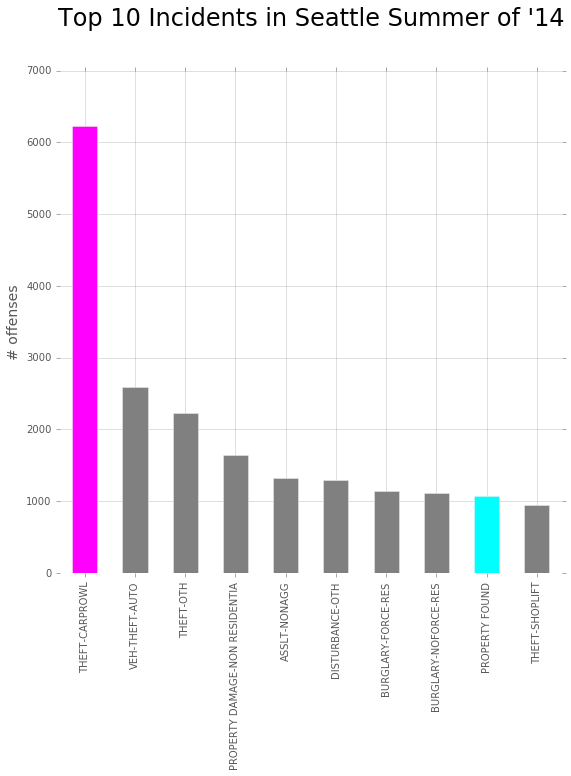

In [11]:
barcolors = []
colormap = ['magenta', 'gray','gray','gray','gray','gray','gray','gray','cyan','gray']
figure(facecolor='white', figsize=(9,9))
title("Top 10 Incidents in Seattle Summer of '14", fontsize=TITLESIZE,  y=TITLEYPOS)
top10bars = top10[:10].plot(kind='bar', color=colormap)
# Remove plot frame
top10bars.set_frame_on(False)
top10bars.grid(True, color='grey', alpha=0.5)
plt.ylabel("# offenses", fontsize=14)

show()

Carprowls happen the most -- by far.  (But at least "Property Found" happens frequently enough that it's in the top 10!)

Let's look at all of the days together (and their top 10 offenses) and see if it's obvious as to why Friday is so high.

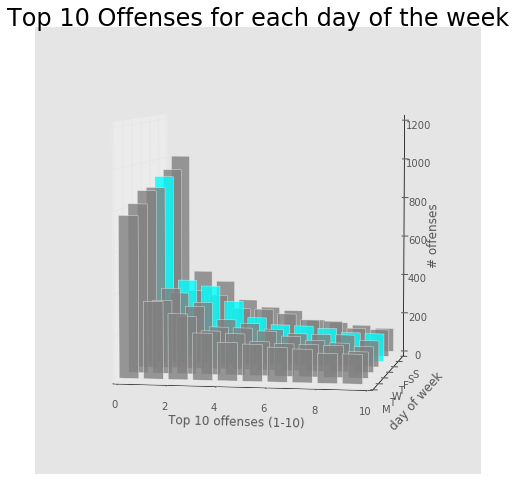

In [12]:
fig = plt.figure( figsize=(8,8), edgecolor='w')

ax = fig.add_subplot(111, projection='3d')
ax.set_title("Top 10 Offenses for each day of the week", fontsize=TITLESIZE,  y=TITLEYPOS)

barcolors =  ['gray', 'gray','gray','gray','cyan','gray','gray']
fig = plt.figure(facecolor='white')

for day in range(0,7):
    thisDayDF = offensesByDayDF[offensesByDayDF.day == day]
    thisDay10 = thisDayDF[:10]
    xs = thisDay10['rank']
    ys = thisDay10['count']
    ax.bar(xs, ys, zs=day, zdir='y', alpha=0.8, color=barcolors[day] )

#for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
#    xs = np.arange(20)
#    ys = np.random.randint(10, size=20)
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
#    cs = [c] * len(xs)
#    cs[0] = 'c'
#    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)
ax.azim = -80
ax.elev = 5
ax.set_xlabel('Top 10 offenses (1-10)')
ax.set_ylabel('day of week')
ax.set_zlabel('# offenses')
xticklabels = ['M', 'T','W','T','F','S','S']
ax.set_yticklabels(xticklabels)


show()

Friday is in cyan.  We can see that perhaps the top second, third, and maybe fourth offenses have a higher occurence than Thursday and Saturday, we really need to see the cumulative amounts.

Since car prowls are the #1 Offense for all days, let's see if Friday has a particularly high number of car prowls.

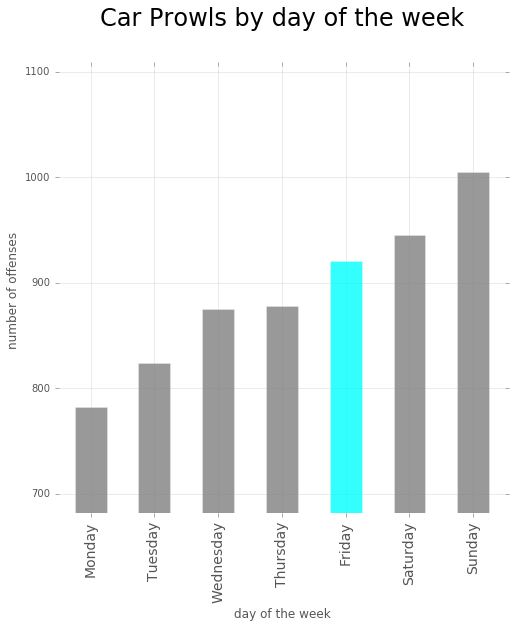

In [13]:
# are there more car prowls on Friday? How does does car prowls look across the week?
def top10forDays(offensesByDayDF):
    top10s = {}
    for i in range(0,7):
        thisDay = offensesByDayDF[offensesByDayDF.day == i]
        thisDay10 = thisDay[:10]
        top10s[i] = thisDay10

    top10sDF = pd.concat(top10s)
    return top10sDF

top10DF = top10forDays(offensesByDayDF)
daysPivot = top10DF.reset_index().pivot_table(index="day", columns="Offense Type", values="count")
daysPivot.fillna(0)
carprowls = daysPivot.pop('THEFT-CARPROWL')
 
barcolors =  ['gray', 'gray','gray','gray','cyan','gray','gray']
carprowlsPlot = carprowls.plot(legend=False, figsize=(8,8),color=barcolors, alpha=0.8, kind='bar')
plt.ylabel("number of offenses")
plt.xlabel("day of the week")       

# Remove grid lines (dotted lines inside plot)
plt.title("Car Prowls by day of the week", fontsize=TITLESIZE,  y=TITLEYPOS)
figure(facecolor='white')
#weekdayPlot.legend.remove()
carprowlsPlot.set_frame_on(False)
carprowlsPlot.grid(True, color='grey', alpha=0.3)
ymax = carprowls.max() + 100
ymin = carprowls.min() - 100
carprowlsPlot.set_ylim([ymin, ymax])
xticklabels = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
carprowlsPlot.set_xticklabels(xticklabels, fontsize = 14)


show()

Clearly, Sunday has the most car prowls, so car prowls aren't the (only) reason why Friday has the most offenses. Let's keep looking.


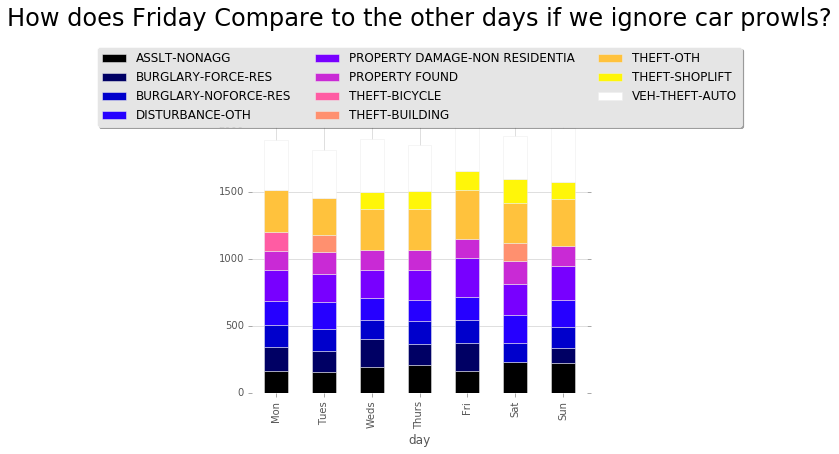

In [33]:
# just want the 1op 10 else this gets too unreadable
top10DF = top10forDays(offensesByDayDF)
daysPivot = top10DF.reset_index().pivot_table(index="day", columns="Offense Type", values="count")
daysPivot.fillna(0)
daysPivot.pop('THEFT-CARPROWL')

cmap = plt.get_cmap(COLORMAP)
figure(facecolor='white')

weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
daysPlot = daysPivot.plot(kind='bar', stacked=True, legend=True, cmap=cmap, figsize=(6,6))
daysPlot.set_frame_on(False)
daysPlot.grid(True, color='grey', alpha=0.5)
daysPlot.set_title("How does Friday Compare to the other days if we ignore car prowls?", fontsize=TITLESIZE,  y=TITLEYPOS)
daysPlot.set_xticklabels(weekdays)

daysPlot.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
show()

We can now see that certain offenses *are* common to each day.  Those are:

* Assault-Non agressive (ASSLT-NONACG)
* Burglary-No Force - Residential (BURGLARY-NOFORCE-RES) doesn't make it into the top 10 on Saturday.
* Disturbance-Other (DISTURBANCE-OTH)
* Property Damange-Non Residential (PROPERTY DAMAGE-NON RESIDENTIA)
* Property Found (PROPERTY FOUND)
* Theft - Other (THEFT-OTH)
* Auto Theft (VEH-THEFT-AUTO)

And here are the offenses that don't occur in the top 10 for every day of the week:

* Burglary-Forced Residential (BURGLARY-FORCE-RES) -- doesn't make the top 10 for Saturday
* Theft - Bicycle -- only appears in the top 10 on Monday
* Theft - Building (THEFT -- only appears in the top 10 on Tuesday and Saturday
* Theft - Shoplifting (THEFT-SHOPLIFT) -- doesn't make the top 10 for Monday or Tuesday


We can see that 'THEFT-OTH' and 'PROPERTY DAMAGE-NON RESIDENTIA[L]' are higher on Friday.  Let's look at this a little more

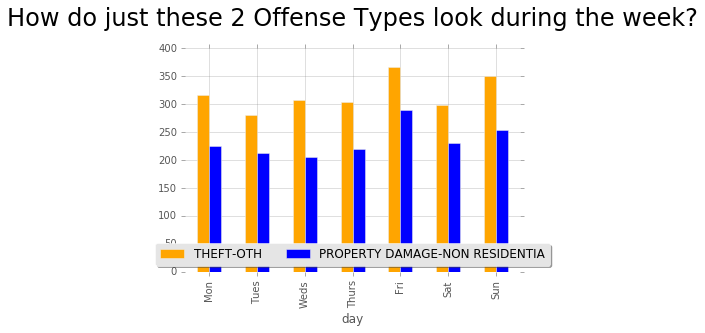

In [36]:
#top10DF = top10forDays(offensesByDayDF)
daysPivot = top10DF.reset_index().pivot_table(index="day", columns="Offense Type", values="count")
daysPivot.fillna(0)
daysPivot.pop('THEFT-CARPROWL')
theftOthers = daysPivot.pop('THEFT-OTH')
propertyDamageNonRes = daysPivot.pop('PROPERTY DAMAGE-NON RESIDENTIA')
fridayHighs = pd.DataFrame()
fridayHighs['THEFT-OTH'] = theftOthers
fridayHighs['PROPERTY DAMAGE-NON RESIDENTIA'] = propertyDamageNonRes
cmap = plt.get_cmap(COLORMAP)
figure(facecolor='white')
colors = ['orange', 'blue']
weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
daysPlot = fridayHighs.plot(kind='bar', legend=True, color = colors)
daysPlot.set_frame_on(False)
daysPlot.grid(True, color='grey', alpha=0.5)
daysPlot.set_title("How do just these 2 Offense Types look during the week?", fontsize=TITLESIZE,  y=TITLEYPOS)
daysPlot.set_xticklabels(weekdays)
daysPlot.legend(loc='lower center', ncol=3, fancybox=True, shadow=True)
show()

We can see that Property Damage is quite higher than the levels during the week

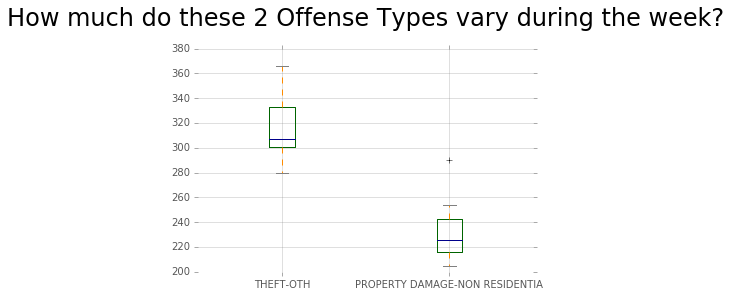

In [40]:
#top10DF = top10forDays(offensesByDayDF)

cmap = plt.get_cmap(COLORMAP)
figure(facecolor='white', figsize=(8,8))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',  medians='DarkBlue', caps='Gray')
daysPlot = fridayHighs.plot(kind='box', legend=True, color = color)
daysPlot.set_frame_on(False)
daysPlot.grid(True, color='grey', alpha=0.5)
daysPlot.set_title("How much do these 2 Offense Types vary during the week?", fontsize=TITLESIZE,  y=TITLEYPOS)
#daysPlot.legend(loc='lower center', ncol=3, fancybox=True, shadow=True)

show()

We larger box and the bigger range for the **Theft Other** offense type varies more.  That is, the size shows us that there's a bigger difference across the days of the week for **Theft Other** when compared to **Property Damage - Non Residential**.

This offense is a large part of why Fridays had more offenses during the summer of '14 in Seattle. 

*Final notes:  Since I was primary looking at values and categories and felt that those were best represented by bar graphs, there wasn't a lot of opportunity to show how different *shapes* might have helped.  

I know that looking at the varience of the different # of offenses per day (e.g. the variance for an offence across all days of the week) would be the way to analyze this quicker and better.  But the assignment wasn't about that.*